In [1]:
# standard imports
import pandas as pd
import numpy as np
# import custom netdata stuff from our package
from netdata_api_utils.utils import api, get_metrics

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

ModuleNotFoundError: No module named 'netdata_api_utils'

## df_allmetrics

In [2]:
df_allmetrics = pd.DataFrame.from_dict(
    api(
        endpoint='allmetrics',
        options='?format=json'
    ),
    orient='index'
)
print(df_allmetrics.shape)
df_allmetrics.sample(10)

(210, 5)


,name,context,units,last_updated,dimensions
netdata.web_thread2_cpu,netdata.web_thread2_cpu,netdata.web_cpu,milliseconds/s,1568390933,"{'user': {'name': 'user', 'value': 0.0}, 'syst..."
groups.vmem,groups.vmem,groups.vmem,MiB,1568390934,"{'ntp': {'name': 'ntp', 'value': 95.5976562}, ..."
groups.uptime_min,groups.uptime_min,groups.uptime_min,seconds,1568390934,"{'ntp': {'name': 'ntp', 'value': 13080.0}, 'an..."
cpu.cpu2,cpu.cpu2,cpu.cpu,percentage,1568390934,"{'guest_nice': {'name': 'guest_nice', 'value':..."
disk_inodes._run,disk_inodes._run,disk.inodes,inodes,1568390934,"{'avail': {'name': 'avail', 'value': 1924919.0..."
apps.uptime,apps.uptime,apps.uptime,seconds,1568390934,"{'netdata': {'name': 'netdata', 'value': 12539..."
netdata.server_cpu,netdata.server_cpu,netdata.server_cpu,milliseconds/s,1568390934,"{'user': {'name': 'user', 'value': 2.961929}, ..."
ipv4.sockstat_sockets,ipv4.sockstat_sockets,ipv4.sockstat_sockets,sockets,1568390934,"{'used': {'name': 'used', 'value': 142.0}}"
users.uptime_avg,users.uptime_avg,users.uptime_avg,seconds,1568390934,"{'ntp': {'name': 'ntp', 'value': 13080.0}, 'an..."
system.softnet_stat,system.softnet_stat,system.softnet_stat,events/s,1568390934,"{'processed': {'name': 'processed', 'value': 1..."


## df

In [3]:
n_metrics = 10
df = get_metrics(df_allmetrics['name'].sample(n_metrics).values)
print(df.shape)
df.sample(10)

(480, 4)


,time,name,label,value
34,1568390640,users.major_faults,root,0
0,1568390880,groups.swap,ntp,0
3,1568390700,groups.lreads,ntp,0
84,1568390640,cpu.cpu2,iowait,0.0166667
19,1568390340,groups.swap,andrewm4894,0
17,1568390460,groups.swap,andrewm4894,0
57,1568390460,groups.swap,nogroup,None
30,1568390880,groups.lreads,root,1.07307
79,1568390340,cpu.cpu2,nice,0
14,1568390640,cpu.cpu2,guest,0


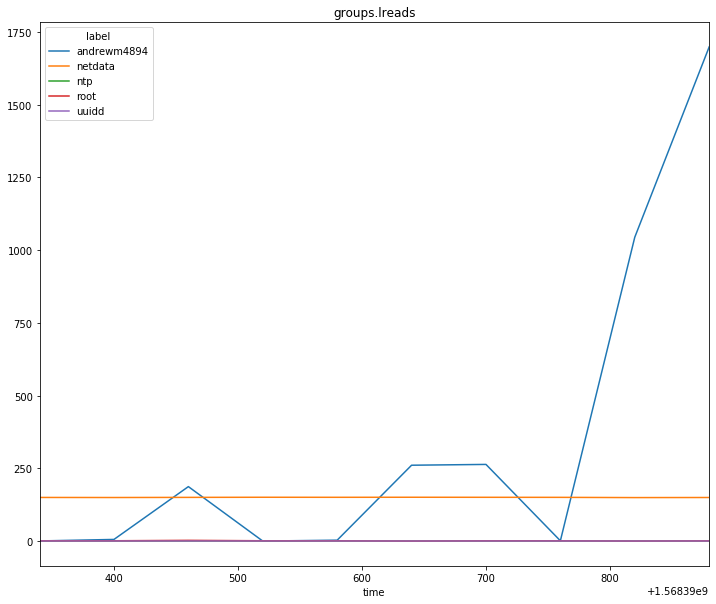

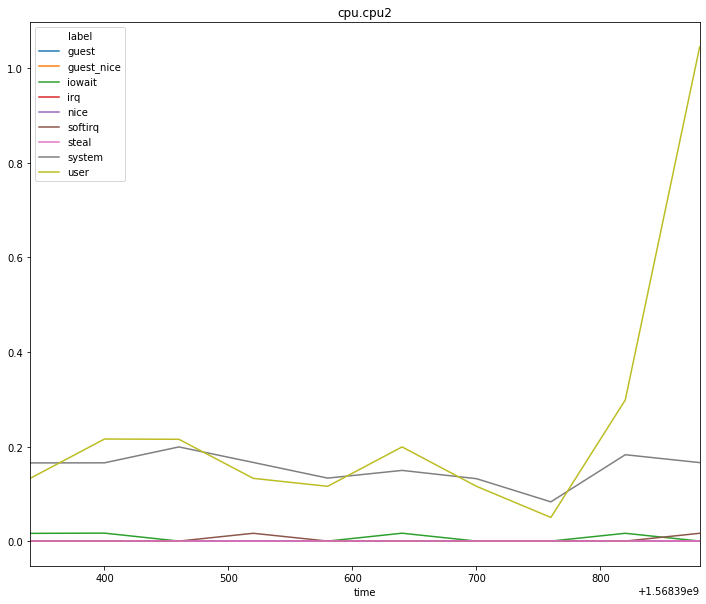

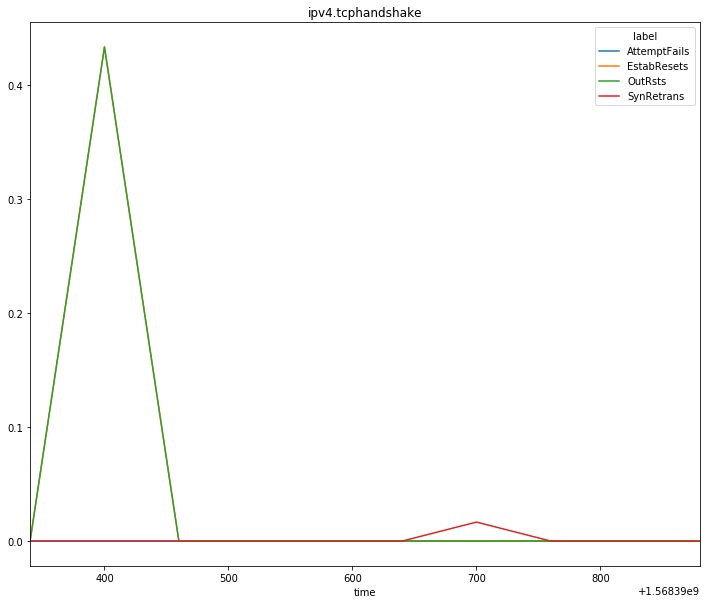

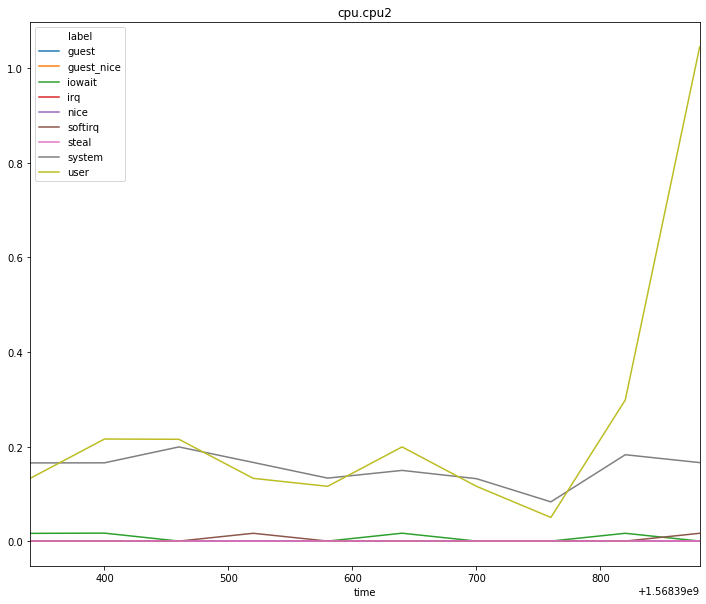

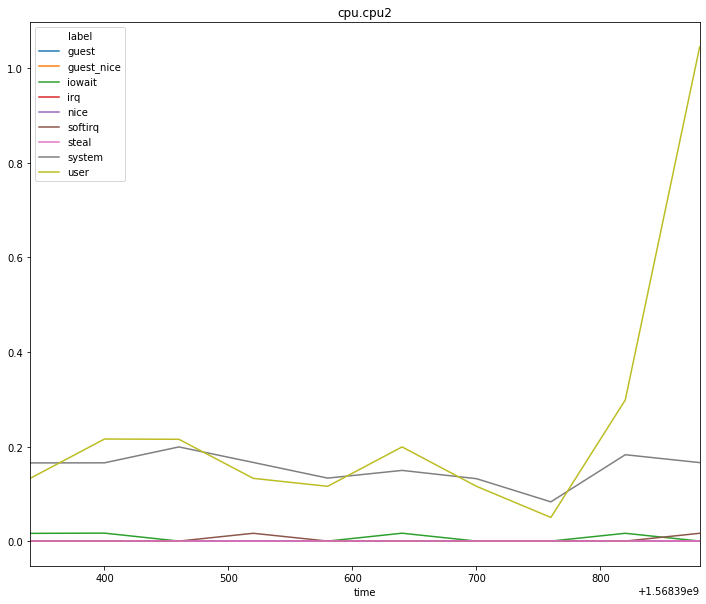

In [4]:
# plot some random metrics
n_plots = 5
for n in range(n_plots):
    sample_metric_name = df['name'].sample(1).values[0]
    df[df['name']==sample_metric_name].pivot(index='time',columns='label',values='value').plot(title=sample_metric_name, figsize=(12,10))